# Proyek Analisis Data: [Bike Sharing dataset]
- **Nama:** Azzah Azkiyah Angeli Syahwa
- **Email:** m010b4kx0777@bangkit.academy
- **ID Dicoding:** azzahangeli

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : "Faktor lingkungan apa yang memiliki dampak paling signifikan terhadap penggunaan *Bike Sharing* (Rental Sepeda)?"
- Pertanyaan 2 : "Bagaimana pengaruh waktu terhadap penyewaan sepeda di berbagai musim?"


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Datasets are saved in a drive
day_path = "/content/drive/MyDrive/Data Analytic using Python/Final Project/submission/Dataset/day.csv"
hour_path = "/content/drive/MyDrive/Data Analytic using Python/Final Project/submission/Dataset/hour.csv"

# Using pandas library to read the data from .csv file
day_df = pd.read_csv(day_path, delimiter=",")
hour_df = pd.read_csv(hour_path, delimiter=",")

The datasets above consists of two files, namely **day.csv** and **hour.csv**. in the next anaylis process, for the question :

> What environmental factors have the most significant impact on bike rental usage?

I will use the **day.csv** file because it contains environmental factors such as temprature, humidity, wind speed, aggregated daily.

And as for the question :
> How does the time of day influence bike rentals across different seasons?

I will work with the **hour.csv** file, which contains bike rental data break down by the hour.






In [ ]:
# Check the shape of the data, to get insight of how many rows and columns provided in the dataset using pandas method .shape()

# get shape from dataframe day_df
print(day_df.shape)

# get shape from dataframe hour_df
print(hour_df.shape)


(731, 16)
(17379, 17)


In [ ]:
# Check the first few rows from both dataframe to find out information provided from the table.

# View a few first rows from dataframe day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# View a few first rows from dataframe hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Find out a summary from the datasets such as data types, non-null counts, etc. Using info() method

# Get dataframe day_df's basic informations
print(day_df.info())

# Get dataframe hour_df's basic informations
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- The Bike-sharing-dataset.zip provided two csv files, which is **day.csv**, and **hour.csv**.
- The file **day.csv** aggregated data on a daily basis while the file **hour.csv** aggregated data on a hourly basis.
- The file **day.csv** has 731 entries data and 16 columns while the file **hour.csv** has more entries, which is 17.379 entries and 17 columns.
- Both dataframes from two datasets have no missing valuesn in any of the columns, it's giving a good point for data integrity.

### Assessing Data

Based on the insights gained from the data gathering process before, i will reassess the data to ensure its cleanliness and quality.



> Missing Values



In [ ]:
# Assessing Missing Value on the dataframe day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Assessing Missing Value on the dataframe hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0




> Duplicate rows



In [ ]:
# Assessing Duplicate rows on the dataframe day_df
day_df.duplicated().sum()

0

In [ ]:
# Assessing Duplicate rows on the dataframe hour_df
hour_df.duplicated().sum()

0



> Outlier



In [ ]:
# Identifying outliers in 'temp' column of day_df

# Calculate Q1 and Q3
Q1 = day_df['temp'].quantile(0.25)
Q3 = day_df['temp'].quantile(0.75)

print("Q1:", Q1)
print("Q3:", Q3)

# Calculate the IQR
IQR = Q3 - Q1

print("IQR:", IQR)

# Calculate cut_off
cut_off_daydf = IQR * 1.5

# Calculate outlier bounds (min and max identified as lower and upper)
lower_bound_daydf = Q1 - cut_off_daydf
upper_bound_daydf = Q3 + cut_off_daydf

print("Lower Bound:", lower_bound_daydf)
print("Upper Bound:", upper_bound_daydf)

# Identify outliers
outliers = day_df[(day_df['temp'] < lower_bound_daydf) | (day_df['temp'] > upper_bound_daydf)]

# Display the outliers
print("Outliers in day_df (temp):\n", outliers)

Q1: 0.3370835
Q3: 0.6554165000000001
IQR: 0.3183330000000001
Lower Bound: -0.14041600000000015
Upper Bound: 1.1329160000000003
Outliers in day_df (temp):
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
# Check min and max values in temp column in day_df
print("Min Temp:", day_df['temp'].min())
print("Max Temp:", day_df['temp'].max())


Min Temp: 0.0591304
Max Temp: 0.861667


In [ ]:
# Identifying outliers in 'temp' column of hour_df

# Calculate Q1 and Q3
Q1_hourdf = hour_df['temp'].quantile(0.25)
Q3_hourdf = hour_df['temp'].quantile(0.75)

print("Q1:", Q1)
print("Q3:", Q3)

# No need to Calculate the IQR as it's been calculated in previous cell
# IQR = Q3 - Q1

print("IQR:", IQR)

# Calculate cut_off
cut_off_hourdf = IQR * 1.5

# Calculate outlier bounds (min and max identified as lower and upper)
lower_bound_hourdf = Q1 - cut_off_daydf
upper_bound_hourdf = Q3 + cut_off_daydf

print("Lower Bound:", lower_bound_hourdf)
print("Upper Bound:", upper_bound_hourdf)

# Identify outliers
outliers_hourdf = hour_df[(hour_df['temp'] < lower_bound_hourdf) | (hour_df['temp'] > upper_bound_hourdf)]

# Display the outliers
print("Outliers in hour_df (temp):\n", outliers_hourdf)

Q1: 0.3370835
Q3: 0.6554165000000001
IQR: 0.3183330000000001
Lower Bound: -0.14041600000000015
Upper Bound: 1.1329160000000003
Outliers in hour_df (temp):
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
# Check min and max values in temp column in hour_df
print("Min Temp:", hour_df['temp'].min())
print("Max Temp:", hour_df['temp'].max())


Min Temp: 0.02
Max Temp: 1.0




> Invalid Data Type



In [ ]:
# Re-assess data types from both dataframes
day_dtypes = day_df.dtypes
hour_dtypes = hour_df.dtypes

print(day_dtypes)
print(hour_dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [ ]:
# Check unique values from both dataframes
day_unique_values = {col: day_df[col].unique() for col in ['season', 'weathersit', 'holiday', 'weekday']}
hour_unique_values = {col: hour_df[col].unique() for col in ['season', 'weathersit', 'holiday', 'weekday', 'hr']}

print("day_df unique value for categorical columns are : \n")
print(day_unique_values)

print("\nhour_df unique value for categorical columns are : \n")
print(hour_unique_values)

day_df unique value for categorical columns are : 

{'season': array([1, 2, 3, 4]), 'weathersit': array([2, 1, 3]), 'holiday': array([0, 1]), 'weekday': array([6, 0, 1, 2, 3, 4, 5])}

hour_df unique value for categorical columns are : 

{'season': array([1, 2, 3, 4]), 'weathersit': array([1, 2, 3, 4]), 'holiday': array([0, 1]), 'weekday': array([6, 0, 1, 2, 3, 4, 5]), 'hr': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])}


In [ ]:
# Checking distribution of numerical variables in both dataframes
day_description = day_df.describe()
hour_description = hour_df.describe()

In [ ]:
# Print description from day_df
day_description

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Print description from hour_df
hour_description

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- From the data assessing process, both dataframes have no missing values, duplicated rows, or any outliers detected.
- 'Temp' column from dataframe **day_df** has the min value 0.0591304, and max value 0.861667.
- Meanwhile, 'temp' column from dataframe **hour_df** has the min value 0.02, and max value 1.0.
- Besides the different min and max values from both dataframes, it still has the same lower and upper bounds.
- To find the correlation between variables for both dataframe, the **dteday** column should be converted to a datetime format for time-based analysis.
-For both day_df and hour_df, the distributions of variables like temp, atemp, hum, and windspeed show a reasonable spread without any extreme outliers.

### Cleaning Data

Based on the insights gained from the previous data assessing process, **there's no duplicated data, missing data, or extreme values beyond outliers were found in both dataframes.** So in this cleaning process, i will make changes to the dteday column instead.

In [ ]:
# Still, i should clean the data :)

day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

print("Sum of the duplicated data from day_df: ", day_df.duplicated().sum())
print("While the sum of the duplicated data from hour_df: ", hour_df.duplicated().sum())

Sum of the duplicated data from day_df:  0
While the sum of the duplicated data from hour_df:  0


In [ ]:
# Convert dteday column to datetime format for both dataframes
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Confirm the conversion
day_df['dteday'].dtype, hour_df['dteday'].dtype


(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [ ]:
# Re-analyze the correlation after converting the column dteday
day_correlation = day_df.corr()
hour_correlation = hour_df.corr()

day_correlation
print("\n")
hour_correlation

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


**Insight:**
- Same as the data assessing process, both dataframes have no missing values, duplicated rows, or any outliers detected.
- No major gaps detected in the date columns of either dataframe.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
# View summarize of statistic params from day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


From the dataframe day_df, there's so many to explore. First off, i will explore the Seasonal Trends to analyze how bike rentals change across seasons. It can be used to identify when demand is highest based on **season** column against weather conditions like temp.

In [ ]:
# Find out seasonal trends with grouping by season and calculate the average count of rentals
season_rentals = day_df.groupby('season')['cnt'].mean()
season_rentals

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


Then, i will try to group the daily rental trends.

In [ ]:
# Grouping by date column to see daily rental trends
daily_rentals = day_df.groupby('dteday')['cnt'].sum()
daily_rentals.head()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


And then i will try to explore casual and registered users from day_df.

In [ ]:
# Grouping by season and calculate the avg rentals for casual and registered users
casual_vs_registered = day_df.groupby('season')[['casual', 'registered']].mean()
casual_vs_registered


,casual,registered
season,,
1,334.928177,2269.204420
2,1106.097826,3886.233696
3,1202.611702,4441.691489
4,729.112360,3999.050562




> *Notes for categorization season* ->   1:springer, 2:summer, 3:fall, 4:winter


Then i'll try to find out the weather conditions by grouping weathersit column.

In [ ]:
# Grouping by weather situation to calculate average rentals
weather_rentals = day_df.groupby('weathersit')['cnt'].mean()
weather_rentals


,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [ ]:
# Grouping by season and also calculate the mean temperature and average rentals
weather_temp_season = day_df.groupby('season').agg({
    # Get the most common weather situation
    'weathersit': lambda x: x.mode()[0],
    'temp': 'mean',
     # Average rentals for the season
    'cnt': 'mean'
}).reset_index()

print(weather_temp_season)


   season  weathersit      temp          cnt
0       1           1  0.297748  2604.132597
1       2           1  0.544405  4992.331522
2       3           1  0.706309  5644.303191
3       4           1  0.422906  4728.162921


In [ ]:
# Using the group by method with parameter weather column to see the avg rentals count
weather_rentals = day_df.groupby('weathersit')['cnt'].mean()
weather_rentals

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


**Insight:**
- From the **season** grouping exploration, it identified that the seasom 3, which is **fall** season, has the most rental counts among all season. And season 1 which is **springer**, the rental counts tend to be less among all season.
- From the season calculation for casual and registered users exploration, it identified that in **fall** season, the number of registered users to rent the bike is way bigger than casual users.

## Visualization & Explanatory Analysis

### Pertanyaan 1: "Faktor lingkungan apa yang memiliki dampak paling signifikan terhadap penggunaan *Bike Rental* (Rental Sepeda)?"


Moving forward to analyze : *What environmental factors have the most significant impact on the use of Bike Rental?*

In [ ]:
# Using the method .corr() to find out the correlation between cnt and the enviromental factors
environmental_corr = day_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']].corr()
environmental_corr['cnt']


,cnt
cnt,1.000000
temp,0.627494
atemp,0.631066
hum,-0.100659
windspeed,-0.234545
weathersit,-0.297391


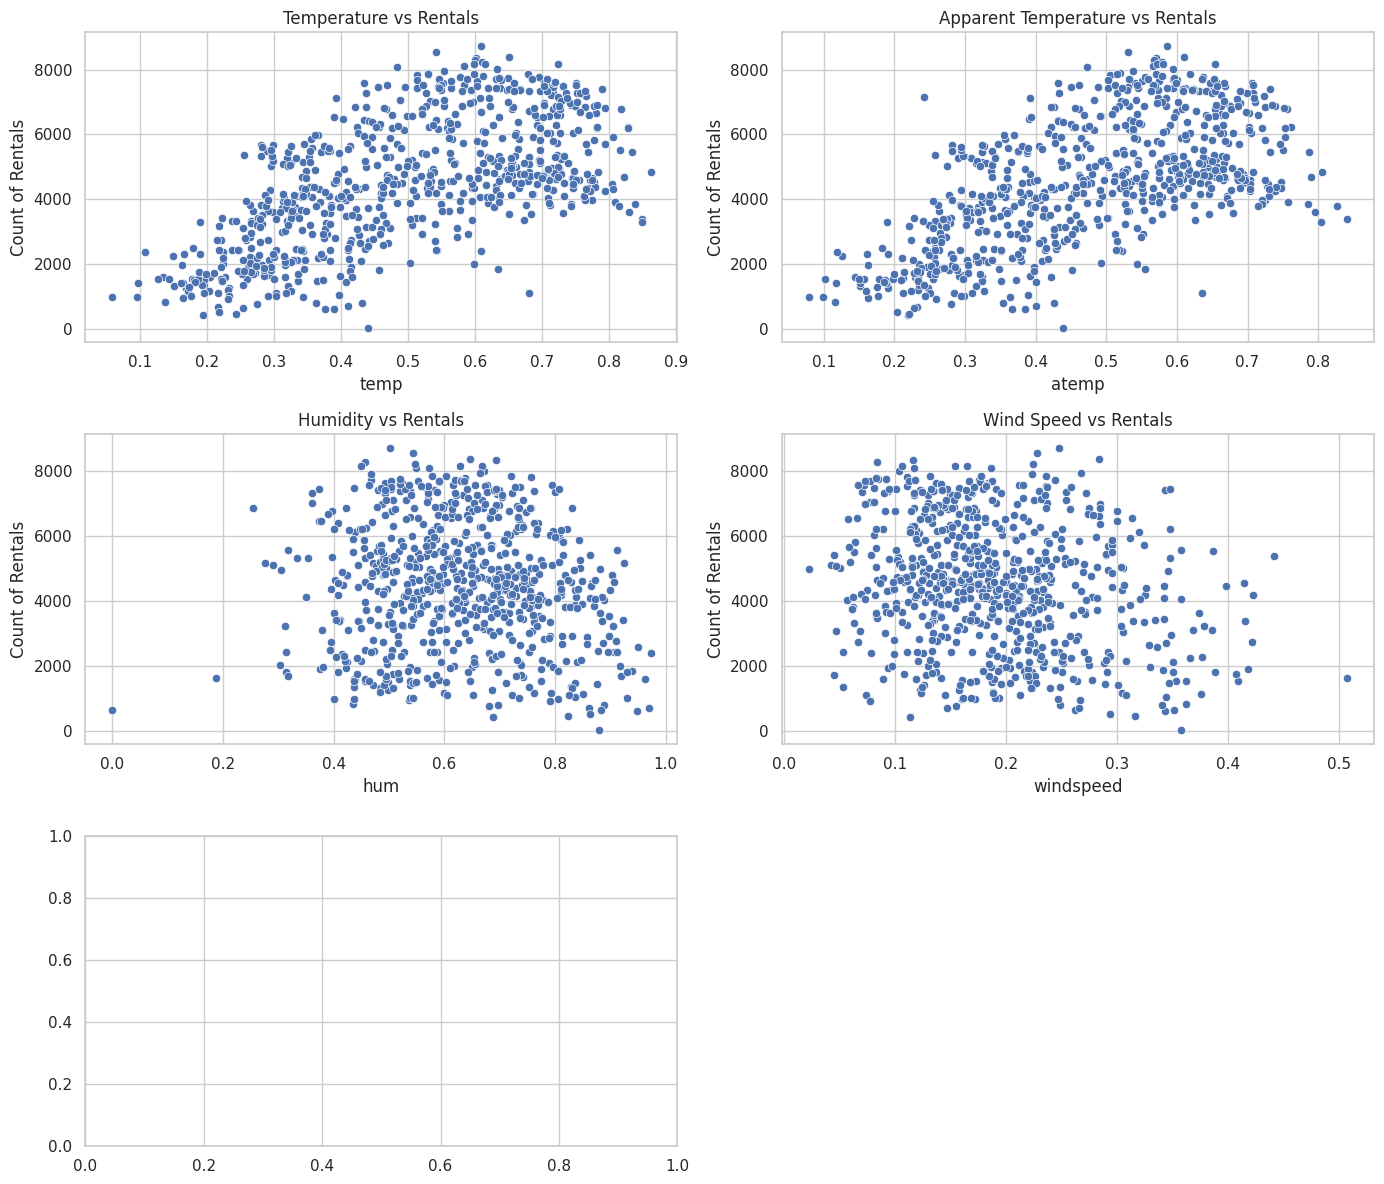

In [ ]:
# Visualization using the scatter plot because the analysis of this question is categorized as Multivariate visualization

# This shall styled the seaborn to a whitegrid
sns.set(style="whitegrid")

# Create a visualization figure with subplots and determine the figure sizing
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Set list of environmental factors without 'weathersit'
variables = ['temp', 'atemp', 'hum', 'windspeed']
titles = ['Temperature vs Rentals', 'Apparent Temperature vs Rentals',
          'Humidity vs Rentals', 'Wind Speed vs Rentals']

# Plotting each variable vs bike rentals using a 'for' iteration
for i, var in enumerate(variables):
    sns.scatterplot(x=day_df[var], y=day_df['cnt'], ax=axs[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Count of Rentals')

# Remove the empty subplot (the last one since we have 4 variables and a 3x2 layout)
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

<ipython-input-35-f4bd41061e88>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

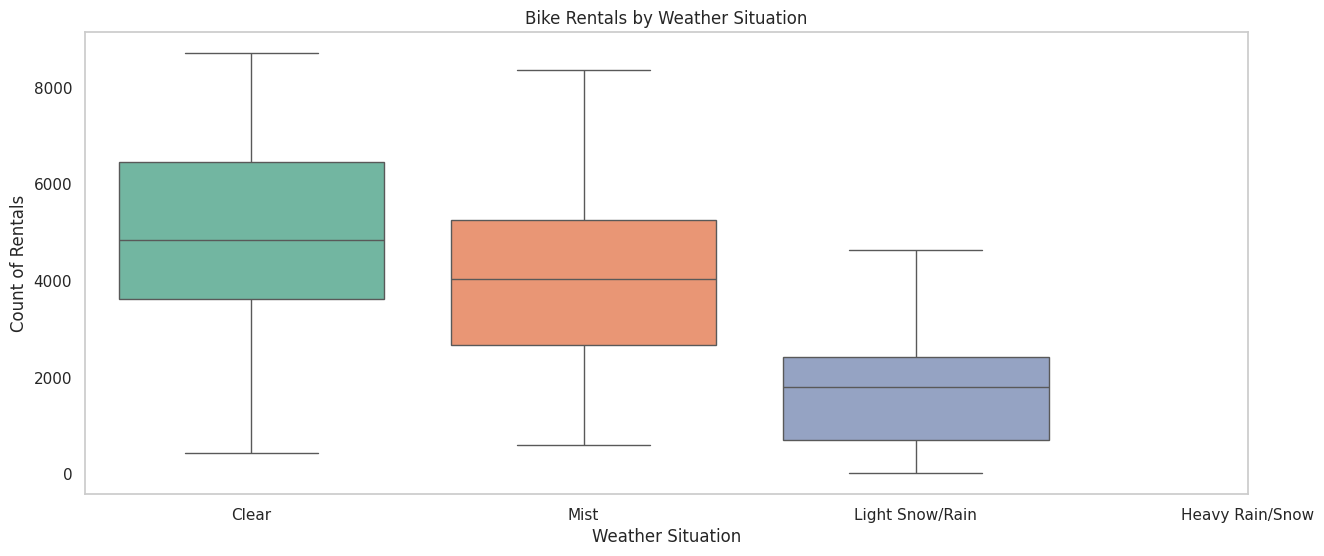

In [ ]:
# This shall styled the seaborn to a whitegrid
sns.set(style="whitegrid")

# Create a figure with a specified size for the box plot
plt.figure(figsize=(15, 6))

# Box plot for Weather Situation vs Bike Rentals
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.grid(axis='y')
plt.show()

Each box in the plot is representing the IQR of the bike rentals for a weather situation. A taller box represent the high number of variability, and vice-versa. The median value represented inside each box with a horizontal line.

**Insight:**
- The scatter plot for Temperature and Apparent Temperature variable has a positive trend, meaning as temperature increases, rentals increase.
- The scatter plot for Humidity variable shows a negative trend. It means that the higher humidity might correlate with fewer rentals.
- The scatter plot for Wind Speed variable is kinda similar to humidity. When the wind speed is high, then it has a fewer rentals trend.
- For the scatter plot regarding to weather variable, since the weathersit is categorical, i used boxplot instead. This shows that a clear weather likely has the highest median bike rentals and a wider range. It indicates the most favorable weather to biking.

### Pertanyaan 2:

Moving forward to analyze : *How does time of day affect bike rentals in different seasons?*

In [ ]:
# Using method group by to find out the avg rentals based on hour and season column
hourly_season_rentals = hour_df.groupby(['hr', 'season'])['cnt'].mean().unstack()
print(hourly_season_rentals)

season           1           2           3           4
hr                                                    
0        27.404494   56.842391   73.914439   56.333333
1        18.140449   35.222826   43.720430   35.920455
2        12.794118   23.380435   30.731183   23.765714
3         7.102564   11.450549   15.752688   11.861272
4         3.181818    6.211111    8.240642    7.267045
5        10.701754   19.169399   26.454545   22.590909
6        40.792135   79.070652  101.315508   81.681818
7       115.391061  221.483696  276.595745  231.607955
8       235.167598  380.135870  421.297872  396.346591
9       147.016760  233.983696  254.930851  239.443182
10      100.217877  189.777174  214.920213  187.465909
11      120.530726  231.440217  251.696809  226.369318
12      150.727778  278.543478  300.308511  281.664773
13      156.527778  282.728261  296.042553  277.209040
14      147.805556  265.777174  282.234043  266.011299
15      155.655556  279.250000  288.409574  279.819209
16      18

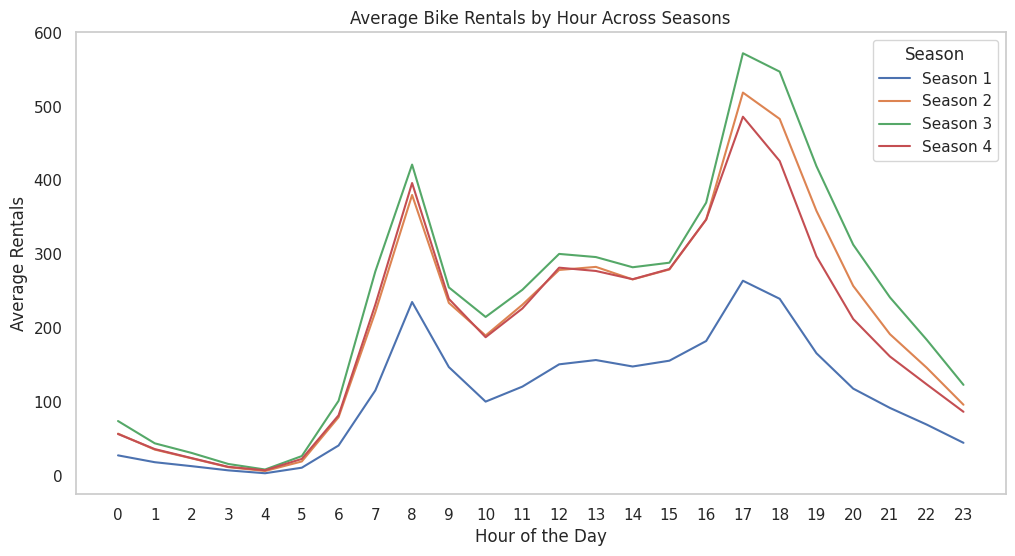

In [ ]:
# Visualization using Line PLot

plt.figure(figsize=(12, 6))
 # 1 to 4 for each season
for season in range(1, 5):
    plt.plot(hourly_season_rentals.index, hourly_season_rentals[season], label=f'Season {season}')

plt.title('Average Bike Rentals by Hour Across Seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
# Show hours from 0 to 23
plt.xticks(range(0, 24))
plt.legend(title='Season', loc='upper right')
plt.grid()
plt.show()

Line Plot will do the plotting by iterates thru each season to plot the avg rentals against the hour of the day, which is 0 - 23.

**Insight:**
- From the hourly trends across all the seasons, it shows that in the early morning, 0 - 6, for spring season the average rentals are relatively low.
- Still in the early morning, the summer season has a slightly higher rentals average than Spring, but the Fall season has the highest number at 73 rentals.
- In the other hand, the winter season has a consistent rental average with Spring for early morning hour.
- For the peak usage hours, Fall season sees the highest average of rentals number at around 420ish rentals at 8am. This indicates that this season is particularly popular for morning commutes.
- For the midday peak usage hour, the Summer season continues to have a high rental at 300 rentals around noon. This indicates that probably people are using bikes at noon for leisure.
- These plots reveals that Fall season consistently exhibits the highest average bike rentals throughout the day.
- In contrast, both Spring and Winter show a lower average rentals, particularly in the early morning and evening, indicating these seasons are less conducive to biking.



## Analisis Lanjutan (Opsional)

## Conclusion

- The analysis indicates that bike rentals are **positively influenced by higher temperatures**, with both temperature and apparent temperature showing a positive correlation with rental counts, suggesting that favorable weather conditions encourage biking. On the other hand, higher humidity and wind speed are associated with a decline in rentals, indicating that poor weather conditions deter users from renting bike.

- Analysis of hourly trends across seasons indicates that bike rentals are generally low in the morning, especially in Spring, where average rentals remain consistently low. In contrast, Fall emerged as the strongest season for morning rentals, peaking at 73 rentals, while Summer showed a slightly higher rental average than Spring during this period, and Winter maintained a similarly low rental average as Spring. In particular, Autumn reached its highest average number of rentals at around 420 at 8am, indicating its popularity for early morning trips. Midday trends further highlight that Summer maintains significant rental activity, peaking at around 300 rentals at noon, which likely reflects leisure usage. Overall, Autumn consistently leads the way in average bike rentals throughout the day, while Spring and Winter show lower average rentals, especially during the morning and afternoon, indicating that these seasons are less favorable for cycling.

In [ ]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.3
aiohttp==3.10.8
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.4
astropy-iers-data==0.2024.9.30.0.32.59
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.19.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
Bottleneck==1.4.0
bqplot==0.12.43
branca==0.8.0
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.4
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


The file txt has been saved to a directory : /content/requirements.txt